# Project Proposal
### Group Members: Sadia, Youjung, Adam

First, let's retrieve the necessary packages.

In [39]:
install.packages("infer")
library(infer)
install.packages("cowplot")
library(cowplot)
library(tidyverse)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



Then, read in the two relevant csv files using the head function to see how they look.

In [59]:
intakes <- "https://raw.githubusercontent.com/adagfs/Stat_201_Group_Project/main/Austin_Animal_Center_Intakes.csv"
outcomes <- "https://raw.githubusercontent.com/adagfs/Stat_201_Group_Project/main/Austin_Animal_Center_Outcomes.csv"

animal_intakes <- read_csv(intakes)
head(animal_intakes)

animal_outcomes <- read_csv(outcomes)
head(animal_outcomes)

Rows: 142192 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Animal ID, Name, DateTime, MonthYear, Found Location, Intake Type,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
A665644,NA,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
A743852,Odin,02/18/2017 12:46:00 PM,February 2017,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


Rows: 141980 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Animal ID, Name, DateTime, MonthYear, Date of Birth, Outcome Type,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NA,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NA,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
A821648,NA,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NA,Other,Unknown,1 year,Raccoon,Gray
A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NA,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
A674754,NA,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
A659412,Princess,10/05/2020 02:37:00 PM,Oct 2020,03/24/2013,Adoption,NA,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown


In order to analyze the datasets, we must first tidy it. This included changing column names, filtering rows, and selecting columns relevant to later analysis. 

<!-- The two datasets had their column names changed to remove spaces and were filtered for the relevant information. For both datasets, Animal Type is filtered to only contain dog and cat while the Animal outcome table was also filtered for the outcome type `Adoption`, as this is the data relevant to our research question. In addition, the `DateTime` field in both tables was renamed, as one refers to the Date when the animal was taken in by the shelter while the other refers to when the animal left the shelter. We then select the relevant columns for each dataset. For the Animal Intake data it was Animal ID, DateTime_Intake, and Animal Type. For the Animal Outcome data it was Animal ID, DateTime_Outcome, and Animal Type. -->

In [3]:
#Discuss which columns are necessary in each dataset and filter it 
names(animal_intakes)<-str_replace_all(names(animal_intakes), c(" " = "_" , "," = "" ))
names(animal_outcomes)<-str_replace_all(names(animal_outcomes), c(" " = "_" , "," = "" ))

tidy_animal_intakes <- animal_intakes %>%
    filter(Animal_Type%in%c("Dog", "Cat")) %>%
    dplyr::rename(DateTime_Intake = DateTime) %>%
    select(Animal_ID, Animal_Type, DateTime_Intake)

tidy_animal_outcomes <- animal_outcomes %>%
    filter(Animal_Type%in%c("Dog", "Cat") & Outcome_Type == "Adoption") %>%
    dplyr::rename(DateTime_Outcome = DateTime) %>%
    select(Animal_ID, DateTime_Outcome)
head(tidy_animal_intakes)
head(tidy_animal_outcomes)

Animal_ID,Animal_Type,DateTime_Intake
<chr>,<chr>,<chr>
A786884,Dog,01/03/2019 04:19:00 PM
A706918,Dog,07/05/2015 12:59:00 PM
A724273,Dog,04/14/2016 06:43:00 PM
A665644,Cat,10/21/2013 07:59:00 AM
A682524,Dog,06/29/2014 10:38:00 AM
A743852,Dog,02/18/2017 12:46:00 PM


Animal_ID,DateTime_Outcome
<chr>,<chr>
A776359,07/18/2018 04:02:00 PM
A720371,02/13/2016 05:59:00 PM
A659412,10/05/2020 02:37:00 PM
A814515,05/06/2020 07:59:00 AM
A689724,10/18/2014 06:52:00 PM
A680969,08/05/2014 04:59:00 PM


To get time spent at the shelter, the two datasets were first combined using Animal_ID, and then filtered.

<!-- Now, with two clean datasets, they can be combined in order to have intake and adoption date information in the same dataset. Afterwards, the dataset will be filtered, removing any rows with DateTime_Outcome as N/A as these animals were not adopted and as such, are not in the focus of our question. (Needs more) -->

In [60]:
# all_animal_data <- merge(tidy_animal_intakes,tidy_animal_outcomes, by="Animal_ID") %>%
#     filter(!is.na(DateTime_Outcome))
# head(all_animal_data)
# nrow(all_animal_data)

adoption_time_data <- merge(tidy_animal_intakes,tidy_animal_outcomes, by="Animal_ID") %>%
    filter(!is.na(DateTime_Outcome)) %>%
    mutate(DateTime_Outcome = as.Date(DateTime_Outcome, format = "%m/%d/%Y"),
          DateTime_Intake = as.Date(DateTime_Intake, format = "%m/%d/%Y"),
          Shelter_Period = as.numeric(difftime(DateTime_Outcome, DateTime_Intake, unit = "days"))) %>%
    filter(Shelter_Period >= 0) %>%
    select(Animal_Type, Shelter_Period)
head(adoption_time_data)

,Animal_Type,Shelter_Period
,<chr>,<dbl>
1,Dog,50
2,Dog,9
3,Dog,23
4,Dog,90
5,Dog,3
6,Dog,147


In order to analyze the data, samples of size 200 were created for dogs and cats. Their sample distributions are plotted below.

<!-- And that's a clean dataset! In order to analyze the time taken for adoption, we find Shelter Time. Then, take a sample of 200. The seed is 310. Plot sample distributions. -->

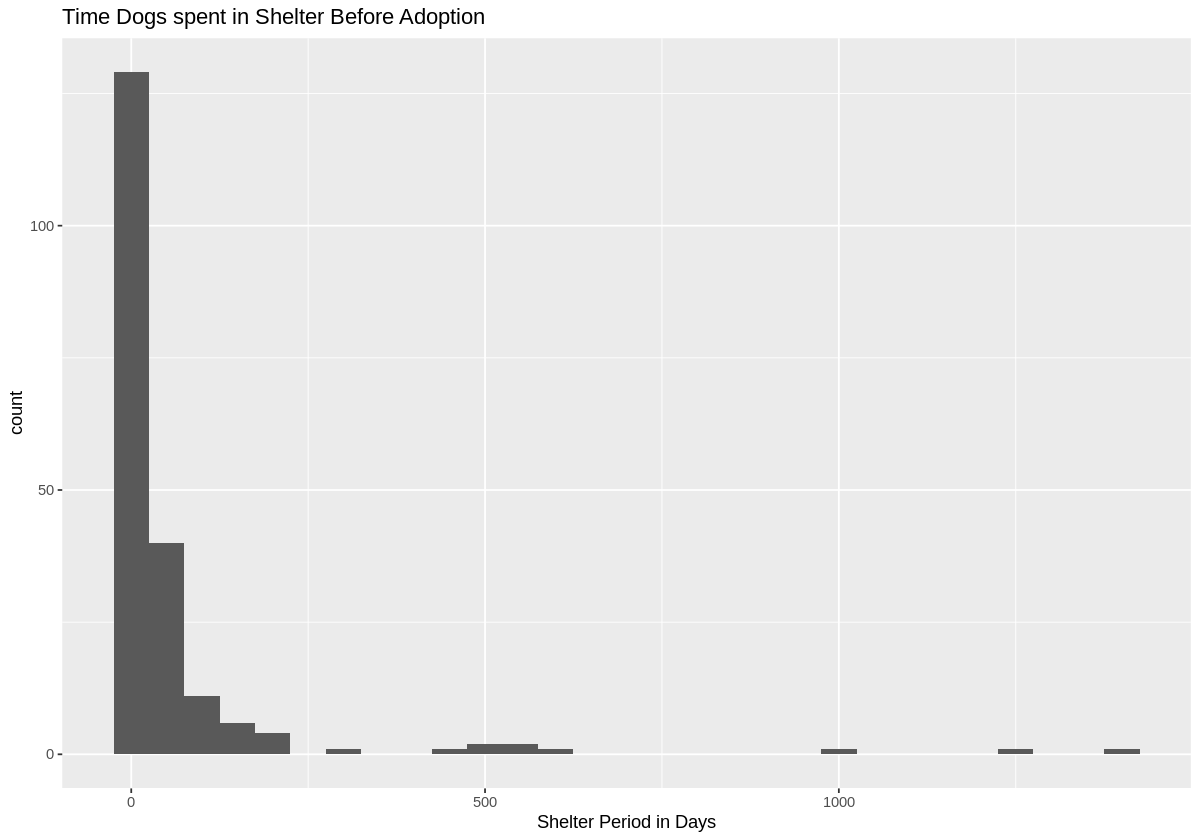

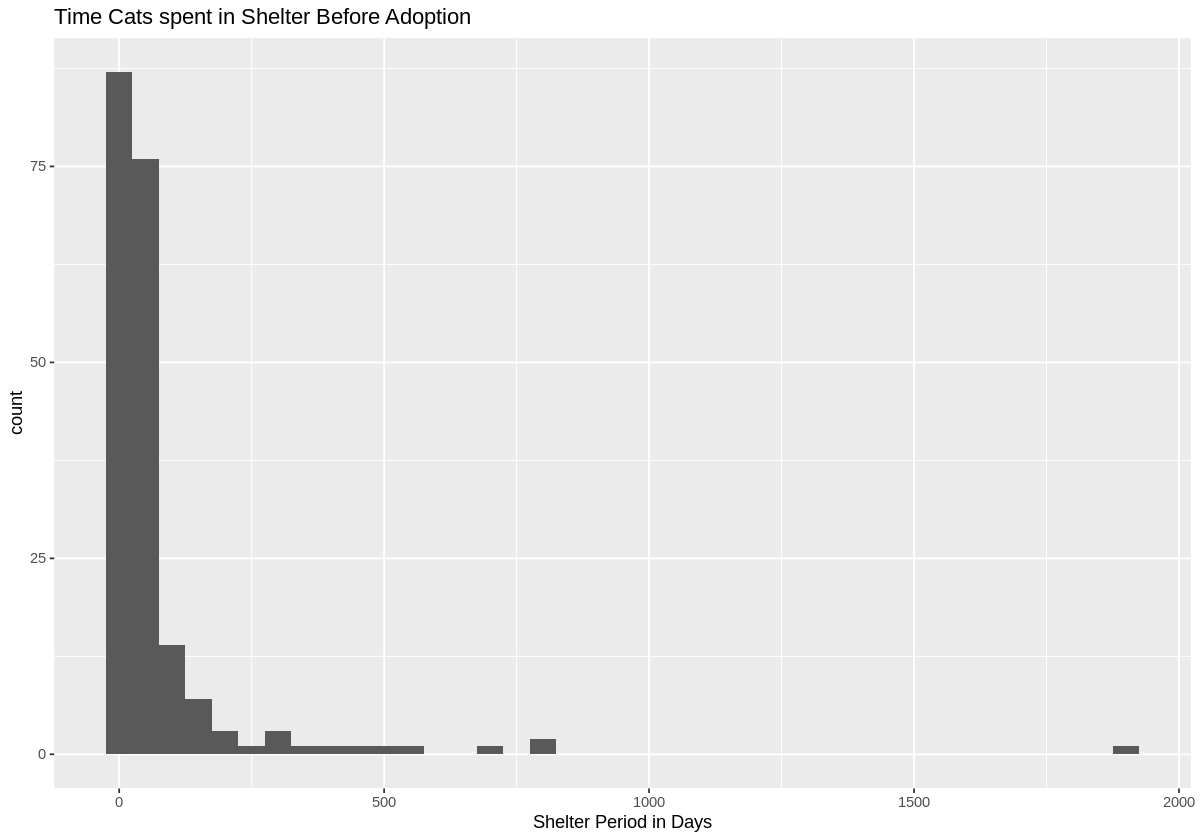

In [61]:
options(repr.plot.width = 10)
set.seed(310)

# Get datasets filtered by species
adoption_time_data_dog <- adoption_time_data %>%
    filter(Animal_Type == "Dog")

adoption_time_data_cat <- adoption_time_data %>%
    filter(Animal_Type == "Cat")

# Dog: Sample (size 200) and Median/IQR Statistics
dog_sample_200 <- adoption_time_data_dog %>%
    rep_sample_n(size = 200) 

#Dog: Sample median calculated
sample_dog_median <- dog_sample_200 %>%
    summarize(med = median(Shelter_Period)) %>%
    pull()

#Dog: Sample standard deviation calculated
sample_dog_sd <- dog_sample_200 %>%
    summarize(sd = sd(Shelter_Period)) %>%
    pull()

# Cat: Sample (size 200)
cat_sample_200 <- adoption_time_data_cat %>%
    rep_sample_n(size = 200) 

#Cat: Sample median calculated
sample_cat_median <- cat_sample_200 %>%
    summarize(med = median(Shelter_Period)) %>%
    pull()

#Cat: Sample standard deviation calculated
sample_cat_sd <- cat_sample_200 %>%
    summarize(sd = sd(Shelter_Period)) %>%
    pull()

# Dog: Sample200 histogram
animal_sample200_dog_dist <- dog_sample_200 %>%
                            ggplot(aes(x = Shelter_Period)) +
                            geom_histogram(binwidth = 50) +
                            labs(x = "Shelter Period in Days", title = "Time Dogs spent in Shelter Before Adoption")
animal_sample200_dog_dist

# # Cat: Sample200 histogram
animal_sample200_cat_dist <- cat_sample_200 %>%
                            ggplot(aes(x = Shelter_Period)) +
                            geom_histogram(binwidth = 50) +
                            labs(x = "Shelter Period in Days", title = "Time Cats spent in Shelter Before Adoption")
animal_sample200_cat_dist

We notice that in the case of both distributions, they are asymmetrical, right skewed, and contain a couple of outliers far on the right side of the graph. A bootstrap distribution with a 95% confidence interval is created for both categories where reps = 10,000.

In [63]:
# Median Sampling Distribution + Confidence Intervals (1000 repetition, 200 samples)
options(repr.plot.width = 10)
set.seed(310)

# Dog: resamples size 200, repetition 10,000
dog_bootstrap <- dog_sample_200 %>%
    specify(response = Shelter_Period) %>%
    generate(type = "bootstrap", reps = 10000) %>%
    calculate(stat = "median")

dog_bootstrap_ci <- dog_bootstrap %>%
    get_confidence_interval(level = 0.95, type = "percentile")

dog_bootstrap_ci
sprintf("Dog Confidence Interval: %s to %s", dog_bootstrap_ci$lower_ci, dog_bootstrap_ci$upper_ci)


dog_bootstrap_distribution <- dog_bootstrap %>%
    visualize(bins = 20) +
    annotate("rect", xmin = dog_bootstrap_ci$lower_ci, xmax = dog_bootstrap_ci$upper_ci, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = sample_dog_median, size = 1, color = "red") +
    labs(x = "Median Time that a Dog Spends at Shelter", title = "Bootstrap Distribution of Median Dog Shelter Time")

# Cat: resamples size 200, repetition 10,000
cat_bootstrap <- cat_sample_200 %>%
    specify(response = Shelter_Period) %>%
    generate(type = "bootstrap", reps = 10000) %>%
    calculate(stat = "median")

cat_bootstrap_ci <- cat_bootstrap %>%
    get_confidence_interval(level = 0.95, type = "percentile")

cat_bootstrap_ci
sprintf("Cat Confidence Interval: %s to %s", cat_bootstrap_ci$lower_ci, cat_bootstrap_ci$upper_ci)

cat_bootstrap_distribution <- cat_bootstrap %>%
    visualize(bins = 20) +
    annotate("rect", xmin = cat_bootstrap_ci$lower_ci, xmax = cat_bootstrap_ci$upper_ci, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = sample_cat_median, size = 1, color = "red") +
    labs(x = "Median Time that a Cat Spends at Shelter", title = "Bootstrap Distribution of Median Cat Shelter Time")



lower_ci,upper_ci
<dbl>,<dbl>
8,15.5


[1] "Dog Confidence Interval: 8 to 15.5"

lower_ci,upper_ci
<dbl>,<dbl>
25,40


[1] "Cat Confidence Interval: 25 to 40"

The following bootstrap distributions are plotted with their CI and median values together:

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”


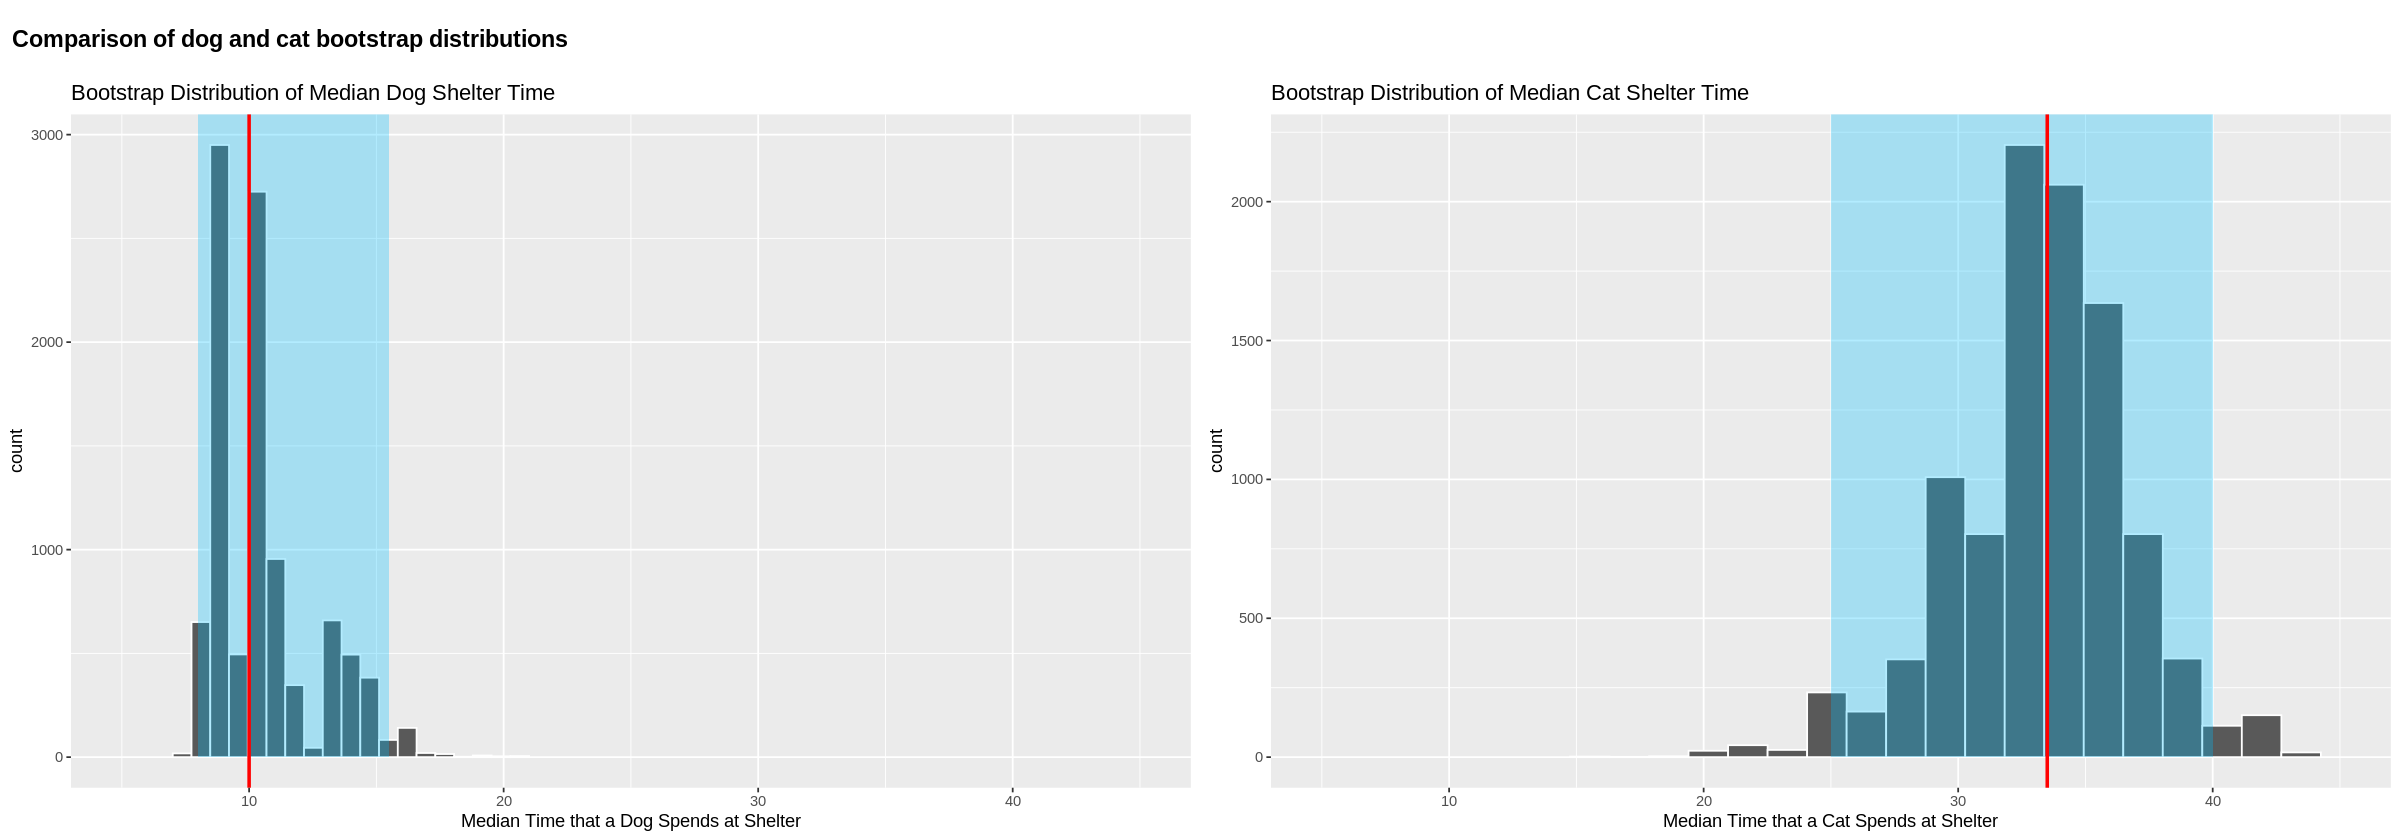

In [65]:
options(repr.plot.width = 20)

proportion_plot_row <- plot_grid(dog_bootstrap_distribution +
                                 scale_x_continuous(limits = c(5, 45)),
                                 cat_bootstrap_distribution +
                                 scale_x_continuous(limits = c(5, 45)),
                                 ncol = 2)

title <- ggdraw() + 
  draw_label("Comparison of dog and cat bootstrap distributions",
             fontface = 'bold',
             x = 0,
             hjust = 0) +
  theme(plot.margin = margin(0, 0, 0, 7))

medians_grid <- plot_grid(title,
                        proportion_plot_row,
                        ncol = 1,
                        rel_heights = c(0.1, 1))

medians_grid

As shown by the graphs and confidence interval, we can say with 95% confidence that the median shelter period for a dog is [8, 15.5] while the median shelter period for a cat is [25, 40]. 
<!-- This would suggest that dogs general have a different (shorter) shelter period than cats. However, we can further analyze this statement using hypothesis testing by combining the two sets. -->

stat
<dbl>
-23.5


Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


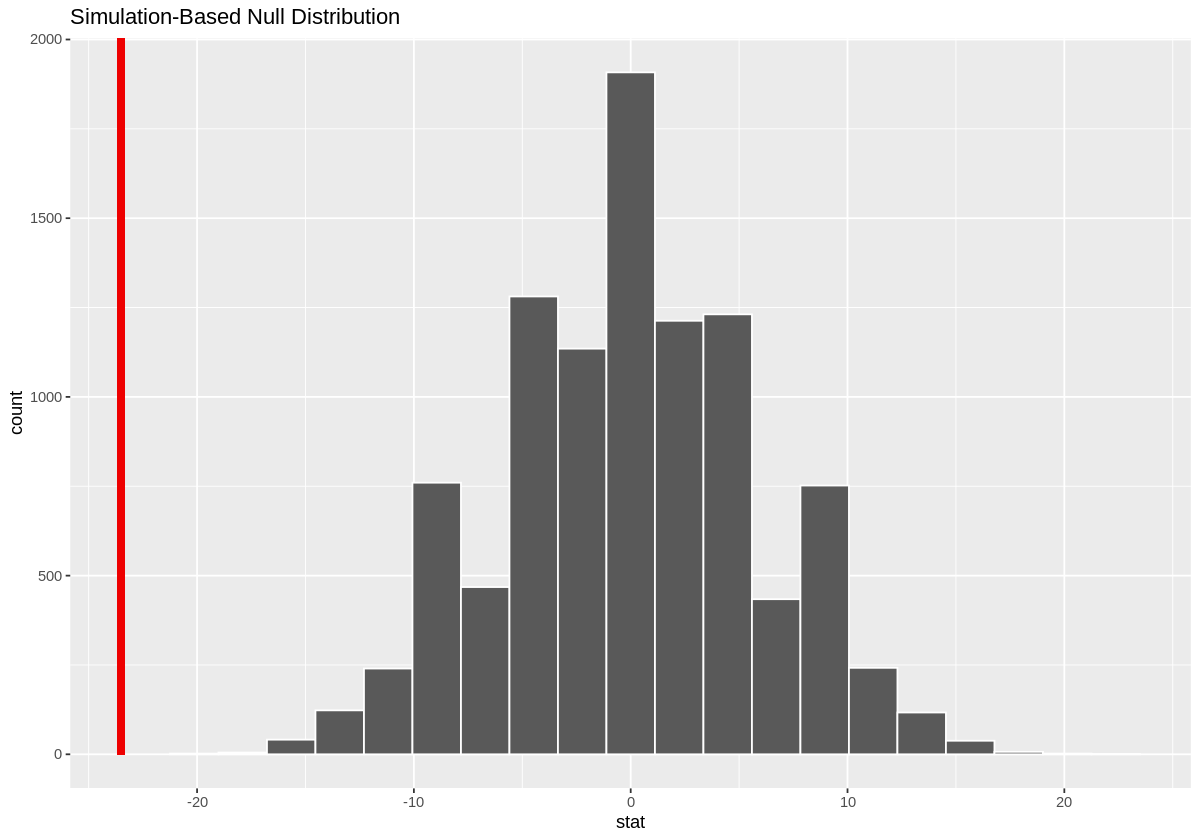

In [66]:
# Hypothesis Testing

set.seed(310)
options(repr.plot.width = 10)

# Dog&Cat: Compute resulting 10000 replicates of median
animal_sample <- rbind(cat_sample_200, dog_sample_200)

null_distribution <- animal_sample %>%
    specify(formula = Shelter_Period ~ Animal_Type) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 10000, type = "permute") %>%
    calculate(stat = "diff in medians", order = c("Dog","Cat"))

# observed difference in period mean
obs_diff_median <- animal_sample %>%
    specify(Shelter_Period ~ Animal_Type) %>%
    calculate(stat = "diff in medians", order = c("Dog","Cat"))
obs_diff_median

# Distribution 
null_model <- null_distribution %>%
    visualize(bins = 20) +
    shade_p_value(obs_stat = obs_diff_median, direction = "both")
null_model

# p_value
null_distribution_p <- null_distribution %>%
    get_p_value(obs_stat = obs_diff_median, direction = "both")  
null_distribution_p

ADD CODE ABT WHAT TO DO WITH P VALUE = 0, AND ADD STATEMENT ABOUT IT.

Due to such a low p value, our null hypothesis is shown to be incorrect, and that dogs and cats have different shelter period times.

To supplement our calculation, we found a confidence interval for the standard deviation for the stay of cats and dogs at a shelter. Then, we displayed the two plots together.

In [69]:
#SD Bootstrap Calculations 

set.seed(310)
options(repr.plot.width = 10)

dog_sd_bootstrap <- dog_sample_200 %>%
    specify(response = Shelter_Period) %>%
    generate(type = "bootstrap", reps = 10000) %>%
    calculate(stat = "sd")

dog_sd_bootstrap_ci <- dog_sd_bootstrap %>%
    get_confidence_interval(level = 0.95, type = "percentile")

dog_sd_bootstrap_ci
sprintf("Dog Confidence Interval: %s to %s", dog_sd_bootstrap_ci$lower_ci, dog_sd_bootstrap_ci$upper_ci)

dog_sd_bootstrap_distribution <- dog_sd_bootstrap %>%
    visualize(bins = 20) +
    annotate("rect", xmin = dog_sd_bootstrap_ci$lower_ci, xmax = dog_sd_bootstrap_ci$upper_ci, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = sample_dog_sd, size = 1, color = "red") +
    labs(x = "Standard Deviation of Time Dog Spends at Shelter", title = "Bootstrap Distribution of Standard Deviation Dog Shelter Time")


cat_sd_bootstrap <- cat_sample_200 %>%
    specify(response = Shelter_Period) %>%
    generate(type = "bootstrap", reps = 10000) %>%
    calculate(stat = "sd")

cat_sd_bootstrap_ci <- cat_sd_bootstrap %>%
    get_confidence_interval(level = 0.95, type = "percentile")

cat_sd_bootstrap_ci
sprintf("Cat Confidence Interval: %s to %s", cat_sd_bootstrap_ci$lower_ci, cat_sd_bootstrap_ci$upper_ci)

cat_sd_bootstrap_distribution <- cat_sd_bootstrap %>%
    visualize(bins = 20) +
    annotate("rect", xmin = cat_sd_bootstrap_ci$lower_ci, xmax = cat_sd_bootstrap_ci$upper_ci, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = sample_cat_sd, size = 1, color = "red") +
    labs(x = "Standard Deviation of Time Cat Spends at Shelter", title = "Bootstrap Distribution of Standard Deviation Cat Shelter Time")

lower_ci,upper_ci
<dbl>,<dbl>
95.25509,238.9778


[1] "Dog Confidence Interval: 95.2550903240131 to 238.977813483658"

lower_ci,upper_ci
<dbl>,<dbl>
88.37009,264.8819


[1] "Cat Confidence Interval: 88.3700895749659 to 264.881932438975"

In [ ]:
options(repr.plot.width = 20)

proportion_plot_row <- plot_grid(cat_sd_bootstrap_distribution +
                                 scale_x_continuous(limits = c(25, 350)),
                                 dog_sd_bootstrap_distribution +
                                 scale_x_continuous(limits = c(25, 350)),
                                 ncol = 2)

title <- ggdraw() + 
  draw_label("Comparison of dog and cat bootstrap distributions",
             fontface = 'bold',
             x = 0,
             hjust = 0) +
  theme(plot.margin = margin(0, 0, 0, 7))

medians_grid <- plot_grid(title,
                        proportion_plot_row,
                        ncol = 1,
                        rel_heights = c(0.1, 1))

medians_grid

Thus, we know that the 95% confidence interval for the standard deviation of Dog Shelter Periods is [95.3, 239] and for Cat Shelter Periods it is [88.4, 264.9]. This shows that dogs and cats likely have similar standard deviations, with the range for Cats being slightly larger.